In [1]:
import tushare as ts
import matplotlib.pyplot as plt
import numpy as np
pro = ts.pro_api()

In [2]:
def stock(code,st_date,En_date):
    def Buy(data):
        if (data['Ac'] > 0):
            date = data['date']
            data['share'] += data['Ac']*0.9994 / df_close.y[date]
            data['Ac'] = 0
            print('date:',df_close.ds[date],'Buy @ price:',df_close.y[date])

    def Sell(data):
        if (data['share'] > 0):
            date = data['date']
            data['Ac'] += data['share']*0.9994 * df_close.y[date]
            data['share'] = 0
            print('date:',df_close.ds[date],'Sell @ price:',df_close.y[date])
    def Trade():
        for t in range(1, len(macd)):
            ratio = macd[t]/macd[t-1]
            if (ratio >0 and ratio <1):
                if macd[t] < -0.5 * mean:
                    data['date'] = t
                    Buy(data)
                if macd[t] > 0.5 * mean:
                    data['date'] = t
                    Sell(data)
    #Get stock info
    df = ts.pro_bar(ts_code = code, adj = 'qfq', start_date = st_date, end_date = En_date)
    df_close = df[['trade_date','close']]
    df_close = df_close.loc[::-1].reset_index(drop = True)
    df_close.columns=['ds','y']
#    plt.plot(df_close.ds, df_close.y)
#    plt.show()

    #MACD and processing
    exp1 = df_close.y.ewm(span=12, adjust=False).mean()
    exp2 = df_close.y.ewm(span=26, adjust=False).mean()

    dif = exp1-exp2
    dea = dif.ewm(span=9, adjust=False).mean()
    macd = (dif-dea) * 2
    macd_abs = abs(macd)
    mean = np.mean(macd_abs)
    for macd_t in macd: 
        if (macd_t == 0):
            macd_t = 0.01
    
    #Account info
    #Account initial total 1,000,000
    data = {'share': 0, 'Ac': 1000000, 'date': 0}
    
    #Trade
    Trade()
    return data['Ac']+ data['share'] * df_close.y[data['date']]

In [12]:
stock('600498.SH', '20200101', '20210514')

date: 20200206 Buy @ price: 23.49
date: 20200226 Sell @ price: 28.79
date: 20200402 Buy @ price: 34.14
date: 20200514 Sell @ price: 35.01
date: 20200601 Buy @ price: 29.28
date: 20200623 Sell @ price: 29.09
date: 20200728 Buy @ price: 28.29
date: 20200924 Sell @ price: 23.91
date: 20201214 Buy @ price: 23.41
date: 20210106 Sell @ price: 24.1
date: 20210203 Buy @ price: 18.84
date: 20210226 Sell @ price: 19.14
date: 20210511 Buy @ price: 17.32


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


1092673.7762853769

In [13]:
stock('600499.SH', '20200101', '20210514')

date: 20200206 Buy @ price: 4.2
date: 20200224 Sell @ price: 5.23
date: 20200319 Buy @ price: 4.47
date: 20200611 Sell @ price: 4.28
date: 20200907 Buy @ price: 4.31
date: 20201109 Sell @ price: 4.58
date: 20210210 Buy @ price: 8.57
date: 20210324 Sell @ price: 9.28
date: 20210414 Buy @ price: 9.86
date: 20210427 Sell @ price: 10.86


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


1502070.6764457102

In [14]:
stock('600508.SH', '20200101', '20210514')

date: 20200206 Buy @ price: 8.33
date: 20200224 Sell @ price: 8.62
date: 20200331 Buy @ price: 8.03
date: 20200512 Sell @ price: 7.95
date: 20200701 Buy @ price: 8.07
date: 20200710 Sell @ price: 9.15
date: 20200729 Buy @ price: 8.98
date: 20201014 Sell @ price: 8.98
date: 20201103 Buy @ price: 8.78
date: 20201125 Sell @ price: 9.65
date: 20201210 Buy @ price: 9.56
date: 20201228 Sell @ price: 10.5
date: 20210115 Buy @ price: 9.22
date: 20210226 Sell @ price: 8.87
date: 20210416 Buy @ price: 9.99
date: 20210513 Sell @ price: 10.05


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


1344152.0705879433

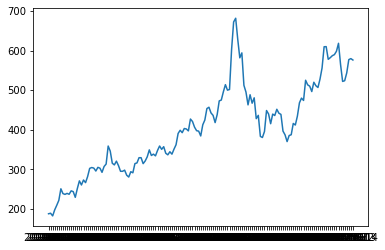

date: 20201201 Buy @ price: 294.1925
date: 20210108 Sell @ price: 402.0409
date: 20210303 Buy @ price: 480.6416
date: 20210412 Sell @ price: 510.0
date: 20210512 Buy @ price: 577.0


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


1443214.4045813307

In [3]:
stock('300896.SZ', '20200101', '20210514')

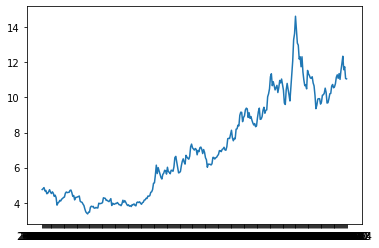

date: 20200205 Buy @ price: 4.03
date: 20200220 Sell @ price: 4.59
date: 20200320 Buy @ price: 3.46
date: 20200416 Sell @ price: 4.25
date: 20200731 Buy @ price: 5.85
date: 20200902 Sell @ price: 7.13
date: 20200918 Buy @ price: 7.03
date: 20201029 Sell @ price: 7.01
date: 20201216 Buy @ price: 8.38
date: 20210111 Sell @ price: 10.67
date: 20210201 Buy @ price: 10.44
date: 20210223 Sell @ price: 13.85
date: 20210311 Buy @ price: 11.54
date: 20210412 Sell @ price: 9.68


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


2388949.0246396307

In [4]:
stock('601899.SH', '20200101', '20210514')

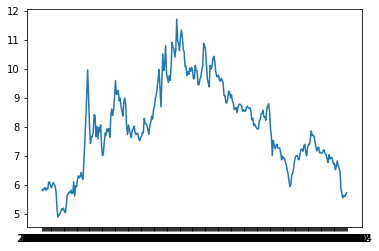

date: 20200207 Buy @ price: 5.06
date: 20200225 Sell @ price: 5.7
date: 20200407 Buy @ price: 7.98
date: 20200507 Sell @ price: 9.13
date: 20200519 Buy @ price: 8.85
date: 20200623 Sell @ price: 8.04
date: 20200731 Buy @ price: 10.11
date: 20200811 Sell @ price: 11.0
date: 20200828 Buy @ price: 10.03
date: 20200923 Sell @ price: 10.18
date: 20201023 Buy @ price: 9.68
date: 20201228 Sell @ price: 8.35
date: 20210115 Buy @ price: 7.34
date: 20210225 Sell @ price: 6.87
date: 20210402 Buy @ price: 7.1


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


834932.9928399959

In [12]:
stock('002560.SZ', '20200101', '20210514')

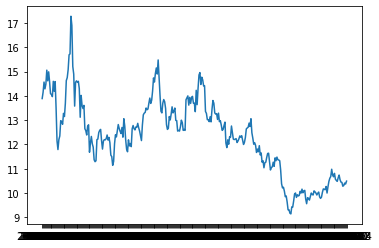

date: 20200206 Buy @ price: 12.35
date: 20200226 Sell @ price: 15.21
date: 20200310 Buy @ price: 14.02
date: 20200410 Sell @ price: 12.16
date: 20200528 Buy @ price: 12.04
date: 20200610 Sell @ price: 12.69
date: 20200721 Buy @ price: 13.85
date: 20200827 Sell @ price: 13.62
date: 20200929 Buy @ price: 13.14
date: 20201125 Sell @ price: 12.18
date: 20201221 Buy @ price: 11.95
date: 20210120 Sell @ price: 11.36
date: 20210201 Buy @ price: 9.88
date: 20210302 Sell @ price: 10.0
date: 20210512 Buy @ price: 10.41


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


974841.2438832162

In [16]:
stock('000823.SZ', '20200101', '20210514')

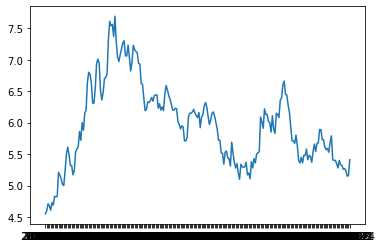

date: 20200729 Buy @ price: 6.7
date: 20200807 Sell @ price: 7.37
date: 20200818 Buy @ price: 7.27
date: 20201014 Sell @ price: 6.43
date: 20201028 Buy @ price: 5.95
date: 20201112 Sell @ price: 6.11
date: 20201214 Buy @ price: 5.53
date: 20210125 Sell @ price: 5.91
date: 20210322 Buy @ price: 5.8
date: 20210420 Sell @ price: 5.73
date: 20210512 Buy @ price: 5.4


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


1001316.1196496146

In [19]:
stock('000976.SZ', '20200524', '20210524')

## SZ market

Code: 002922.SZ


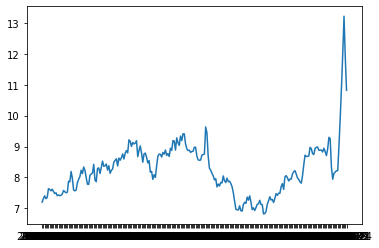

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200914 Buy @ price: 9.0199
date: 20201021 Sell @ price: 8.7127
date: 20201119 Buy @ price: 8.846
date: 20201207 Sell @ price: 8.6895
date: 20201215 Buy @ price: 7.9591
date: 20210125 Sell @ price: 7.1997
date: 20210330 Buy @ price: 8.0518
date: 20210407 Sell @ price: 8.6953
date: 20210428 Buy @ price: 8.9214
date: 20210521 Sell @ price: 11.9
Earn: 1.2289899218456133
Code: 002246.SZ


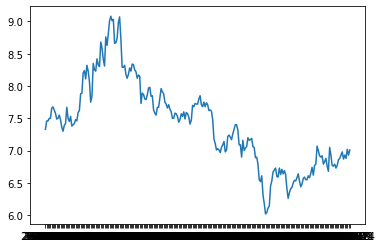

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200616 Buy @ price: 7.42
date: 20200710 Sell @ price: 8.11
date: 20200817 Buy @ price: 8.98
date: 20201015 Sell @ price: 7.75
date: 20201215 Buy @ price: 7.01
date: 20210106 Sell @ price: 7.32
date: 20210202 Buy @ price: 6.61
date: 20210225 Sell @ price: 6.6
date: 20210510 Buy @ price: 6.77
Earn: 0.991213953148458
Code: 002597.SZ


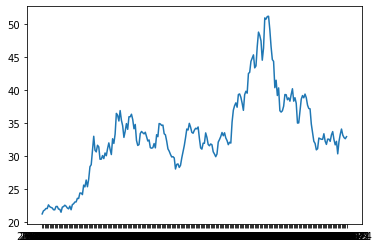

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200807 Buy @ price: 31.1547
date: 20200820 Sell @ price: 35.3475
date: 20200828 Buy @ price: 34.9529
date: 20201019 Sell @ price: 33.4139
date: 20201029 Buy @ price: 29.744
date: 20201117 Sell @ price: 34.4103
date: 20201209 Buy @ price: 31.865
date: 20201225 Sell @ price: 32.7726
date: 20210303 Buy @ price: 40.3689
date: 20210406 Sell @ price: 37.7447
date: 20210416 Buy @ price: 31.1448
date: 20210510 Sell @ price: 32.5358
Earn: 1.2514753262265974
Code: 002125.SZ


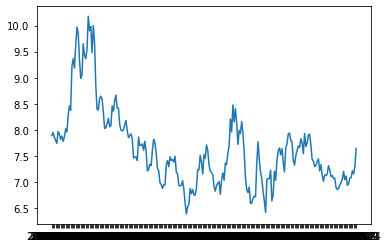

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200721 Buy @ price: 8.6449
date: 20200909 Sell @ price: 7.578
date: 20200929 Buy @ price: 6.9398
date: 20201019 Sell @ price: 7.3786
date: 20201104 Buy @ price: 6.5609
date: 20201119 Sell @ price: 7.1492
date: 20201207 Buy @ price: 6.9697
date: 20201224 Sell @ price: 8.1463
date: 20210114 Buy @ price: 6.5908
date: 20210125 Sell @ price: 7.1791
date: 20210201 Buy @ price: 7.0495
date: 20210223 Sell @ price: 7.5181
date: 20210406 Buy @ price: 7.3885
Earn: 1.272200557810468
Code: 000973.SZ


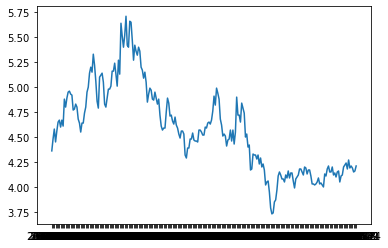

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200630 Buy @ price: 4.64
date: 20200714 Sell @ price: 5.22
date: 20200720 Buy @ price: 5.1
date: 20200814 Sell @ price: 5.4
date: 20200901 Buy @ price: 5.4
date: 20201014 Sell @ price: 4.71
date: 20201103 Buy @ price: 4.39
date: 20201113 Sell @ price: 4.45
date: 20201218 Buy @ price: 4.48
date: 20201231 Sell @ price: 4.65
date: 20210115 Buy @ price: 4.33
date: 20210226 Sell @ price: 4.05
date: 20210406 Buy @ price: 4.05
date: 20210420 Sell @ price: 4.15
Earn: 1.0389262391463792
Code: 000952.SZ


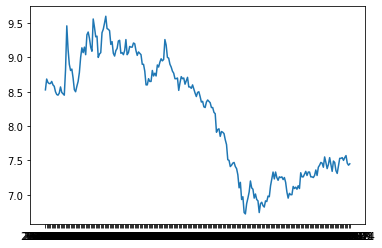

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200702 Buy @ price: 8.65
date: 20200710 Sell @ price: 9.04
date: 20200729 Buy @ price: 9.36
date: 20201019 Sell @ price: 9.0
date: 20201102 Buy @ price: 8.63
date: 20210125 Sell @ price: 6.95
date: 20210316 Buy @ price: 7.12
date: 20210331 Sell @ price: 7.28
date: 20210511 Buy @ price: 7.42
Earn: 0.8229974398401614
Code: 002262.SZ


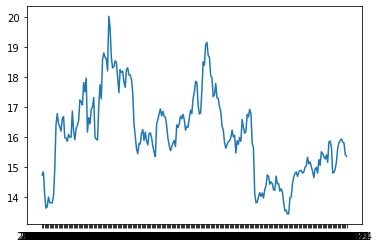

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200601 Buy @ price: 13.9921
date: 20200612 Sell @ price: 16.3374
date: 20200721 Buy @ price: 16.91
date: 20200806 Sell @ price: 18.61
date: 20200821 Buy @ price: 18.24
date: 20201015 Sell @ price: 16.7
date: 20201228 Buy @ price: 15.74
date: 20210118 Sell @ price: 16.12
date: 20210203 Buy @ price: 14.14
date: 20210225 Sell @ price: 14.23
date: 20210512 Buy @ price: 15.18
Earn: 1.2046005050107325
Code: 000533.SZ


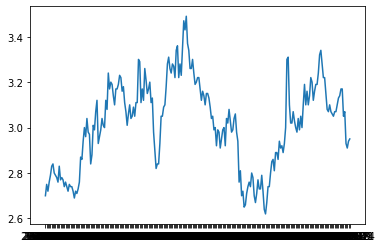

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200619 Buy @ price: 2.75
date: 20200714 Sell @ price: 2.98
date: 20200828 Buy @ price: 3.1
date: 20201021 Sell @ price: 3.26
date: 20201120 Buy @ price: 3.22
date: 20201229 Sell @ price: 2.98
date: 20210114 Buy @ price: 2.66
date: 20210203 Sell @ price: 2.72
date: 20210324 Buy @ price: 3.05
date: 20210419 Sell @ price: 3.28
date: 20210430 Buy @ price: 3.05
Earn: 1.1143358775247991
Code: 002845.SZ


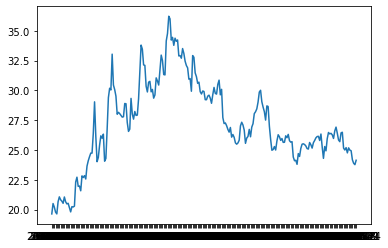

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200728 Buy @ price: 26.72
date: 20200804 Sell @ price: 30.45
date: 20200817 Buy @ price: 28.9
date: 20200907 Sell @ price: 32.14
date: 20200921 Buy @ price: 31.05
date: 20201015 Sell @ price: 34.22
date: 20201028 Buy @ price: 33.51
date: 20201209 Sell @ price: 29.63
date: 20201221 Buy @ price: 26.89
date: 20210107 Sell @ price: 25.56
date: 20210218 Buy @ price: 25.76
date: 20210324 Sell @ price: 25.12
date: 20210514 Buy @ price: 25.18
Earn: 1.0889585451264765
Code: 003033.SZ


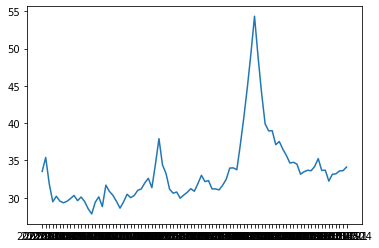

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20210120 Buy @ price: 29.51
date: 20210302 Sell @ price: 31.34
date: 20210316 Buy @ price: 30.72
date: 20210414 Sell @ price: 48.92
date: 20210429 Buy @ price: 34.5
Earn: 1.622597243300133
Code: 002777.SZ


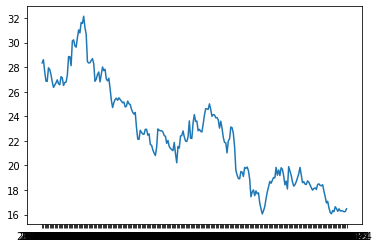

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200601 Buy @ price: 27.9428
date: 20200629 Sell @ price: 28.1187
date: 20200722 Buy @ price: 28.6933
date: 20201019 Sell @ price: 22.4414
date: 20201221 Buy @ price: 23.6007
date: 20210226 Sell @ price: 18.9836
date: 20210413 Buy @ price: 18.1216
Earn: 0.5731955833104527
Code: 002084.SZ


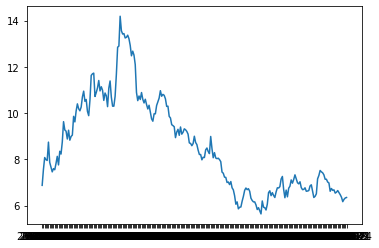

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200720 Buy @ price: 10.57
date: 20200825 Sell @ price: 13.42
date: 20200915 Buy @ price: 10.89
date: 20201020 Sell @ price: 10.62
date: 20201102 Buy @ price: 9.18
date: 20201210 Sell @ price: 8.47
date: 20201229 Buy @ price: 7.02
date: 20210122 Sell @ price: 6.62
date: 20210407 Buy @ price: 6.65
date: 20210423 Sell @ price: 7.33
date: 20210512 Buy @ price: 6.58
Earn: 1.1384100711111884
Code: 002641.SZ


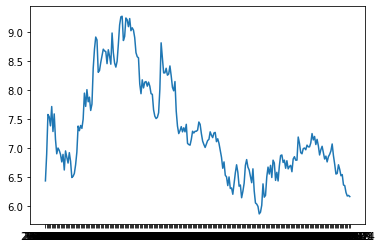

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200616 Buy @ price: 6.95
date: 20200710 Sell @ price: 7.72
date: 20200810 Buy @ price: 8.99
date: 20201015 Sell @ price: 8.3
date: 20201103 Buy @ price: 7.37
date: 20201125 Sell @ price: 7.25
date: 20201225 Buy @ price: 6.5
date: 20210119 Sell @ price: 6.62
date: 20210202 Buy @ price: 6.01
date: 20210219 Sell @ price: 6.49
date: 20210419 Buy @ price: 7.03
Earn: 0.9658161339529323
Code: 002174.SZ


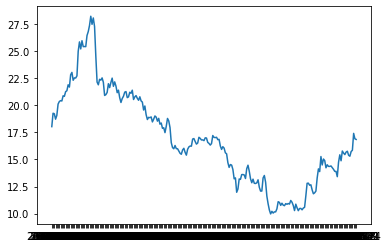

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200722 Buy @ price: 22.5355
date: 20201014 Sell @ price: 17.95
date: 20201020 Buy @ price: 16.29
date: 20201111 Sell @ price: 16.66
date: 20201222 Buy @ price: 14.48
date: 20210113 Sell @ price: 13.22
date: 20210208 Buy @ price: 10.05
date: 20210304 Sell @ price: 10.88
date: 20210429 Buy @ price: 14.75
date: 20210524 Sell @ price: 16.85
Earn: 0.9142779171305181
Code: 002251.SZ


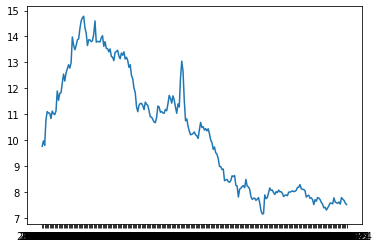

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200723 Buy @ price: 14.09
date: 20201016 Sell @ price: 11.05
date: 20201119 Buy @ price: 10.26
date: 20210120 Sell @ price: 8.23
date: 20210414 Buy @ price: 7.71
Earn: 0.6011606498185309
Code: 001202.SZ


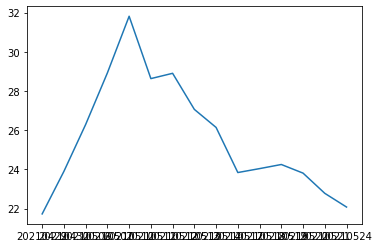

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Earn: 1.0
Code: 000825.SZ


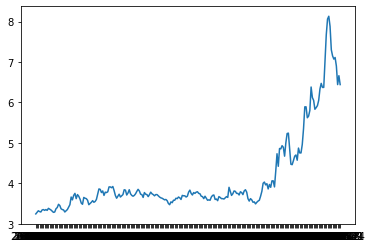

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200728 Buy @ price: 3.53
date: 20200807 Sell @ price: 3.77
date: 20200828 Buy @ price: 3.73
date: 20201119 Sell @ price: 3.66
date: 20201210 Buy @ price: 3.68
date: 20210111 Sell @ price: 3.7
date: 20210208 Buy @ price: 3.53
date: 20210226 Sell @ price: 3.86
date: 20210330 Buy @ price: 4.7
date: 20210413 Sell @ price: 5.62
Earn: 1.3694220352441397
Code: 000069.SZ


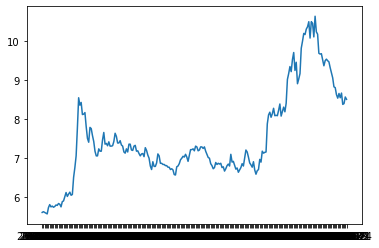

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200729 Buy @ price: 7.23
date: 20201112 Sell @ price: 7.02
date: 20201215 Buy @ price: 6.88
date: 20210121 Sell @ price: 7.02
date: 20210202 Buy @ price: 6.7
date: 20210223 Sell @ price: 8.04
date: 20210426 Buy @ price: 9.49
Earn: 1.0603686122968197
Code: 000861.SZ


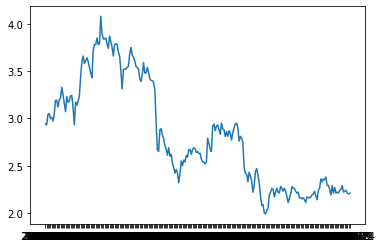

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200630 Buy @ price: 3.1708
date: 20200710 Sell @ price: 3.6095
date: 20200806 Buy @ price: 3.87
date: 20201113 Sell @ price: 2.62
date: 20201230 Buy @ price: 2.85
date: 20210223 Sell @ price: 2.17
Earn: 0.584681654733385
Code: 002684.SZ


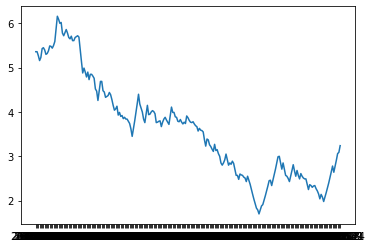

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200709 Buy @ price: 5.68
date: 20200921 Sell @ price: 4.09
date: 20201203 Buy @ price: 3.63
date: 20210302 Sell @ price: 2.34
date: 20210324 Buy @ price: 2.68
date: 20210517 Sell @ price: 2.64
Earn: 0.4556059720561854
Code: 002232.SZ


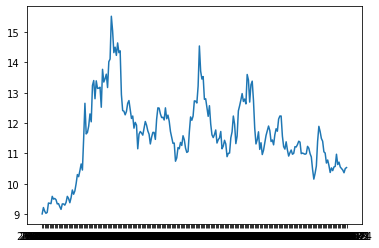

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200828 Buy @ price: 12.38
date: 20201014 Sell @ price: 12.3
date: 20201103 Buy @ price: 11.19
date: 20201124 Sell @ price: 12.66
date: 20201215 Buy @ price: 11.77
date: 20210107 Sell @ price: 11.32
date: 20210204 Buy @ price: 11.35
date: 20210308 Sell @ price: 11.57
date: 20210317 Buy @ price: 11.11
date: 20210422 Sell @ price: 11.4
date: 20210510 Buy @ price: 10.55
Earn: 1.123360466155062
Code: 001202.SZ


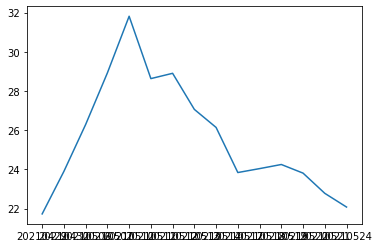

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Earn: 1.0
Code: 002356.SZ


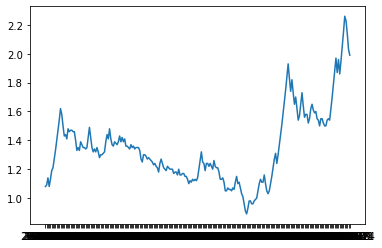

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200706 Buy @ price: 1.39
date: 20200807 Sell @ price: 1.41
date: 20200914 Buy @ price: 1.3
date: 20201126 Sell @ price: 1.25
date: 20201224 Buy @ price: 1.07
date: 20210203 Sell @ price: 1.11
date: 20210324 Buy @ price: 1.65
date: 20210510 Sell @ price: 1.87
Earn: 1.1412547480610458
Code: 002514.SZ


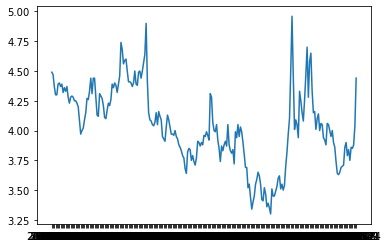

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200601 Buy @ price: 4.39
date: 20200710 Sell @ price: 4.31
date: 20200728 Buy @ price: 4.17
date: 20200807 Sell @ price: 4.32
date: 20200827 Buy @ price: 4.5
date: 20201119 Sell @ price: 3.88
date: 20201210 Buy @ price: 3.87
date: 20201230 Sell @ price: 3.95
date: 20210115 Buy @ price: 3.4
date: 20210223 Sell @ price: 3.51
date: 20210407 Buy @ price: 4.14
date: 20210517 Sell @ price: 3.75
Earn: 0.8309923992659936
Code: 002170.SZ


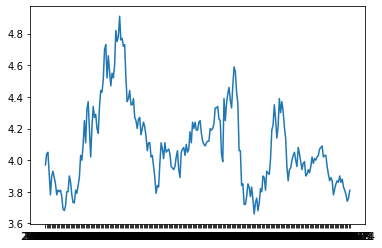

C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200601 Buy @ price: 3.9003
date: 20200710 Sell @ price: 4.11
date: 20200902 Buy @ price: 4.39
date: 20201021 Sell @ price: 4.04
date: 20210115 Buy @ price: 3.77
date: 20210205 Sell @ price: 3.81
date: 20210315 Buy @ price: 4.0
date: 20210420 Sell @ price: 4.02
date: 20210506 Buy @ price: 3.82
Earn: 0.9924577993262236
Code: 002104.SZ


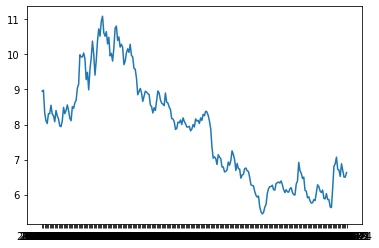

date: 20200601 Buy @ price: 8.31
date: 20200623 Sell @ price: 8.4
date: 20200814 Buy @ price: 10.18
date: 20201015 Sell @ price: 8.61
date: 20201103 Buy @ price: 8.07
date: 20201126 Sell @ price: 8.03
date: 20201217 Buy @ price: 7.14
date: 20210106 Sell @ price: 7.0
date: 20210202 Buy @ price: 5.96
date: 20210225 Sell @ price: 6.14
date: 20210413 Buy @ price: 5.86
date: 20210513 Sell @ price: 6.72
Earn: 0.9782309162258731


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


[1.2289899218456133,
 0.991213953148458,
 1.2514753262265974,
 1.272200557810468,
 1.0389262391463792,
 0.8229974398401614,
 1.2046005050107325,
 1.1143358775247991,
 1.0889585451264765,
 1.622597243300133,
 0.5731955833104527,
 1.1384100711111884,
 0.9658161339529323,
 0.9142779171305181,
 0.6011606498185309,
 1.0,
 1.3694220352441397,
 1.0603686122968197,
 0.584681654733385,
 0.4556059720561854,
 1.123360466155062,
 1.0,
 1.1412547480610458,
 0.8309923992659936,
 0.9924577993262236,
 0.9782309162258731]

In [4]:
List_data = pro.stock_basic(exchange='SZSE', list_status='L', fields='ts_code,symbol,name')
stock_list = List_data[['ts_code']]

Test_list = []
Earn_list = []

for i in range(50):
    r = np.ceil(3043 * np.random.rand())
    code_r = '00000%s'%(int (r))
    code_r = code_r[-6:]+'.SZ'
    if (code_r in stock_list.values):
        print('Code:', code_r)
        Test_list.append(code_r) 
        earn =stock(code_r, '20200524', '20210524') / 1000000
        print('Earn:', earn)
        Earn_list.append(earn)
Earn_list
np.mean(Earn_list)

## SH Market

In [10]:
List_data = pro.stock_basic(exchange='SSE', list_status='L', fields='ts_code,symbol,name')
stock_list = List_data[['ts_code']]
Test_list = []
Earn_list = []

for i in range(50):
    r = np.ceil(2000 * np.random.rand())
    code_r = '0000%s'%(int (r))
    code_r = '6'+code_r[-5:] + '.SH'
    if (code_r in stock_list.values):
        print('Code:', code_r)
        Test_list.append(code_r) 
        earn =stock(code_r, '20200524', '20210524') / 1000000 - 1
        print('Earn:', earn)
        Earn_list.append(earn)
Earn_list
np.mean(Earn_list)

Code: 601778.SH


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


date: 20200622 Buy @ price: 7.6195
date: 20200714 Sell @ price: 8.5259
date: 20200728 Buy @ price: 7.4502
date: 20200925 Sell @ price: 6.67
date: 20201103 Buy @ price: 6.46
date: 20201111 Sell @ price: 6.85
date: 20210118 Buy @ price: 6.8
date: 20210225 Sell @ price: 6.12
date: 20210419 Buy @ price: 6.33
Earn: -0.19483032062613692
Code: 601811.SH
date: 20160919 Buy @ price: 24.4911
date: 20161102 Sell @ price: 24.4911
date: 20161201 Buy @ price: 24.2946
date: 20170124 Sell @ price: 18.0622
date: 20170407 Buy @ price: 19.7897
date: 20170522 Sell @ price: 14.2182
date: 20170719 Buy @ price: 13.3423
date: 20170822 Sell @ price: 13.1119
date: 20170929 Buy @ price: 13.6279
date: 20171023 Sell @ price: 14.3466
date: 20171106 Buy @ price: 13.158
date: 20171218 Sell @ price: 12.0799
date: 20180119 Buy @ price: 11.61
date: 20180307 Sell @ price: 11.1401
date: 20180508 Buy @ price: 11.0203
date: 20180727 Sell @ price: 9.0469
date: 20181017 Buy @ price: 8.0238
date: 20181105 Sell @ price: 8.5448


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


date: 20120726 Buy @ price: 1.7656
date: 20120807 Sell @ price: 1.7984
date: 20120921 Buy @ price: 1.7262
date: 20121016 Sell @ price: 1.7984
date: 20121127 Buy @ price: 1.805
date: 20121213 Sell @ price: 1.8575
date: 20130227 Buy @ price: 1.9559
date: 20130523 Sell @ price: 1.9231
date: 20130626 Buy @ price: 1.799
date: 20130717 Sell @ price: 1.8687
date: 20131223 Buy @ price: 1.8547
date: 20140207 Sell @ price: 1.7362
date: 20140507 Buy @ price: 1.8129
date: 20140617 Sell @ price: 1.9384
date: 20140829 Buy @ price: 2.0135
date: 20141105 Sell @ price: 2.0736
date: 20141217 Buy @ price: 2.6596
date: 20141224 Sell @ price: 2.6822
date: 20150209 Buy @ price: 3.0278
date: 20150325 Sell @ price: 3.2306
date: 20150511 Buy @ price: 3.426
date: 20150611 Sell @ price: 3.7641
date: 20150624 Buy @ price: 3.6063
date: 20150713 Sell @ price: 4.0674
date: 20150803 Buy @ price: 3.4741
date: 20150911 Sell @ price: 3.0681
date: 20151214 Buy @ price: 3.2008
date: 20160224 Sell @ price: 2.5294
date: 201

date: 20120713 Buy @ price: 6.9539
date: 20120920 Sell @ price: 6.3937
date: 20121119 Buy @ price: 6.2977
date: 20121227 Sell @ price: 5.6495
date: 20130318 Buy @ price: 6.3057
date: 20130415 Sell @ price: 6.5458
date: 20130506 Buy @ price: 5.9776
date: 20130717 Sell @ price: 5.3134
date: 20131011 Buy @ price: 7.2019
date: 20131122 Sell @ price: 6.6258
date: 20131225 Buy @ price: 7.0179
date: 20140212 Sell @ price: 7.314
date: 20141119 Buy @ price: 13.8517
date: 20141201 Sell @ price: 15.2521
date: 20141211 Buy @ price: 14.1718
date: 20150127 Sell @ price: 14.6119
date: 20150212 Buy @ price: 14.0117
date: 20150306 Sell @ price: 16.5564
date: 20150604 Buy @ price: 30.2721
date: 20150727 Sell @ price: 19.3812
date: 20150828 Buy @ price: 17.5887
date: 20150925 Sell @ price: 16.2443
date: 20151111 Buy @ price: 20.0294
date: 20151125 Sell @ price: 20.9336
date: 20151203 Buy @ price: 20.0134
date: 20151222 Sell @ price: 21.1176
date: 20160114 Buy @ price: 13.2675
date: 20160215 Sell @ price:

date: 20120706 Buy @ price: 4.57
date: 20120824 Sell @ price: 4.23
date: 20120927 Buy @ price: 4.03
date: 20121023 Sell @ price: 4.46
date: 20121112 Buy @ price: 4.29
date: 20121213 Sell @ price: 3.94
date: 20130227 Buy @ price: 4.32
date: 20130312 Sell @ price: 4.63
date: 20130410 Buy @ price: 4.84
date: 20130718 Sell @ price: 3.9
date: 20131030 Buy @ price: 4.72
date: 20131115 Sell @ price: 5.37
date: 20131205 Buy @ price: 5.28
date: 20140130 Sell @ price: 4.58
date: 20140228 Buy @ price: 4.25
date: 20140326 Sell @ price: 4.73
date: 20140423 Buy @ price: 4.78
date: 20140707 Sell @ price: 5.19
date: 20150126 Buy @ price: 5.92
date: 20150303 Sell @ price: 5.78
date: 20150511 Buy @ price: 9.35
date: 20150608 Sell @ price: 15.92
date: 20150709 Buy @ price: 9.94
date: 20150728 Sell @ price: 9.96
date: 20150828 Buy @ price: 7.8
date: 20150915 Sell @ price: 7.57
date: 20160118 Buy @ price: 8.9
date: 20160225 Sell @ price: 9.72
date: 20160726 Buy @ price: 10.38
date: 20160825 Sell @ price: 1

date: 20120608 Buy @ price: 3.062
date: 20120810 Sell @ price: 2.7224
date: 20121203 Buy @ price: 2.5967
date: 20121221 Sell @ price: 2.9865
date: 20130222 Buy @ price: 3.3134
date: 20130328 Sell @ price: 3.0368
date: 20130618 Buy @ price: 3.4518
date: 20130718 Sell @ price: 3.2947
date: 20131008 Buy @ price: 4.6653
date: 20131122 Sell @ price: 4.4208
date: 20131225 Buy @ price: 4.4143
date: 20140129 Sell @ price: 4.0218
date: 20140303 Buy @ price: 4.1763
date: 20140326 Sell @ price: 4.3693
date: 20140430 Buy @ price: 3.8223
date: 20140704 Sell @ price: 3.765
date: 20140901 Buy @ price: 3.9694
date: 20140923 Sell @ price: 4.3938
date: 20141020 Buy @ price: 4.3545
date: 20141119 Sell @ price: 4.5903
date: 20141226 Buy @ price: 5.0305
date: 20150106 Sell @ price: 5.2899
date: 20150115 Buy @ price: 5.0069
date: 20150203 Sell @ price: 5.0777
date: 20150212 Buy @ price: 4.9126
date: 20150303 Sell @ price: 5.1563
date: 20150511 Buy @ price: 7.1606
date: 20150528 Sell @ price: 8.0724
date: 20

date: 20120531 Buy @ price: 8.1317
date: 20120608 Sell @ price: 8.9281
date: 20120719 Buy @ price: 10.0531
date: 20120808 Sell @ price: 11.6256
date: 20120903 Buy @ price: 12.2169
date: 20121017 Sell @ price: 14.7839
date: 20121030 Buy @ price: 14.1187
date: 20121217 Sell @ price: 12.6806
date: 20130301 Buy @ price: 18.4127
date: 20130509 Sell @ price: 20.9327
date: 20130522 Buy @ price: 20.2951
date: 20130705 Sell @ price: 19.3925
date: 20130723 Buy @ price: 19.2309
date: 20130807 Sell @ price: 19.3184
date: 20130823 Buy @ price: 18.0521
date: 20130925 Sell @ price: 18.3283
date: 20131021 Buy @ price: 18.5977
date: 20131104 Sell @ price: 19.0288
date: 20131217 Buy @ price: 20.0863
date: 20140106 Sell @ price: 20.9889
date: 20140228 Buy @ price: 21.521
date: 20140328 Sell @ price: 20.0998
date: 20140429 Buy @ price: 18.7189
date: 20140512 Sell @ price: 18.9345
date: 20140714 Buy @ price: 22.242
date: 20140813 Sell @ price: 22.826
date: 20140828 Buy @ price: 21.3497
date: 20140915 Sell 

date: 20191107 Buy @ price: 7.1565
date: 20191128 Sell @ price: 6.374
date: 20200206 Buy @ price: 5.5248
date: 20200225 Sell @ price: 5.5916
date: 20200324 Buy @ price: 5.0763
date: 20200410 Sell @ price: 5.0573
date: 20200729 Buy @ price: 5.2
date: 20201125 Sell @ price: 4.51
date: 20201225 Buy @ price: 4.42
date: 20210224 Sell @ price: 4.23
date: 20210407 Buy @ price: 4.22
date: 20210517 Sell @ price: 4.25
Earn: -0.25468086371775445
Code: 601888.SH
date: 20131017 Buy @ price: 18.3682
date: 20141128 Sell @ price: 19.9293
date: 20150630 Buy @ price: 31.4149
date: 20150724 Sell @ price: 33.3024
date: 20150807 Buy @ price: 28.8707
date: 20150817 Sell @ price: 32.0144
date: 20150827 Buy @ price: 24.7442
date: 20150923 Sell @ price: 25.4598
date: 20151201 Buy @ price: 24.2529
date: 20151223 Sell @ price: 28.3507
date: 20160112 Buy @ price: 25.3167
date: 20160323 Sell @ price: 21.1903
date: 20170417 Buy @ price: 25.1893
date: 20170907 Sell @ price: 30.7146
date: 20171129 Buy @ price: 39.921

date: 20120629 Buy @ price: 2.367
date: 20121025 Sell @ price: 2.2773
date: 20121119 Buy @ price: 2.1697
date: 20121211 Sell @ price: 2.2056
date: 20130320 Buy @ price: 2.3311
date: 20130522 Sell @ price: 2.2415
date: 20130618 Buy @ price: 2.1249
date: 20130717 Sell @ price: 1.9639
date: 20131008 Buy @ price: 2.1022
date: 20131129 Sell @ price: 2.1575
date: 20131224 Buy @ price: 2.0468
date: 20140213 Sell @ price: 2.0192
date: 20141028 Buy @ price: 2.7286
date: 20141105 Sell @ price: 2.9938
date: 20150115 Buy @ price: 3.4865
date: 20150303 Sell @ price: 3.496
date: 20150511 Buy @ price: 5.4855
date: 20150528 Sell @ price: 6.2719
date: 20150709 Buy @ price: 4.2663
date: 20150724 Sell @ price: 5.7934
date: 20150828 Buy @ price: 4.6862
date: 20150925 Sell @ price: 4.0372
date: 20151202 Buy @ price: 4.5526
date: 20160225 Sell @ price: 3.4264
date: 20160426 Buy @ price: 3.7318
date: 20160613 Sell @ price: 3.6841
date: 20160705 Buy @ price: 3.7784
date: 20160819 Sell @ price: 3.8169
date: 20

0.20321499903020038

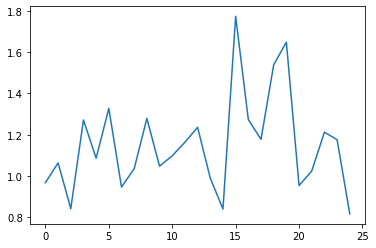

In [6]:
plt.plot(range(len(Earn_list)),Earn_list)

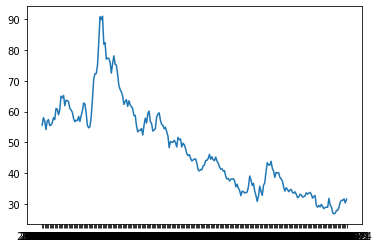

date: 20200707 Buy @ price: 58.42
date: 20200803 Sell @ price: 90.95
date: 20200814 Buy @ price: 78.1
date: 20200924 Sell @ price: 56.71
date: 20201027 Buy @ price: 50.1
date: 20201209 Sell @ price: 44.5
date: 20201231 Buy @ price: 38.06
date: 20210126 Sell @ price: 36.0
date: 20210316 Buy @ price: 34.45
date: 20210521 Sell @ price: 30.29
0.8300595761391585


C:\Z\General\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [18]:
try:
    earn =stock('000710.SZ', '20200524', '20210524') / 1000000
    print(earn)
    Earn_list.append(earn)
except Exception:
    pass

In [17]:
earn

NameError: name 'earn' is not defined

In [2]:
df = ts.pro_bar(ts_code='000001.SZ', adj='qfq', start_date='20180101', end_date='20181011')

In [31]:
'00000067'[-6:]+'.SZ'

'000067.SZ'

In [7]:
'6'+'00000001'[-5:] + '.SH'

'600001.SH'

In [36]:
Earn_list

[]

In [8]:
try:
    a= 1+1
    print(a)
except:
    pass

2
